<a href="https://colab.research.google.com/github/Hack4social/FraudGuard/blob/main/Hoodhack6_FraudGuard_GraceQin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Author: Grace Qin

**Project Goal:** To protect Robinhood's value customers and business brand, I'm trying to build a useful ML model to detect fraudulent transations for online payments.

**Training Dataset**: 

Dataset from [Kaggle] is used in this project to train and build the ML model (https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset)

Note: - Full dataset csv filesize is 493MB and has 6.36 million records.

Column Reference from dataset

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction, 0 - No Fraud, 1 - Fraud

In [43]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Loading the online-payments.csv from kaggle dataset - https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
fileUrl="/content/PS_20174392719_1491204439457_log.csv"
data = pd.read_csv(fileUrl)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [27]:
# imprting the dataset
payments = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
print(payments.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


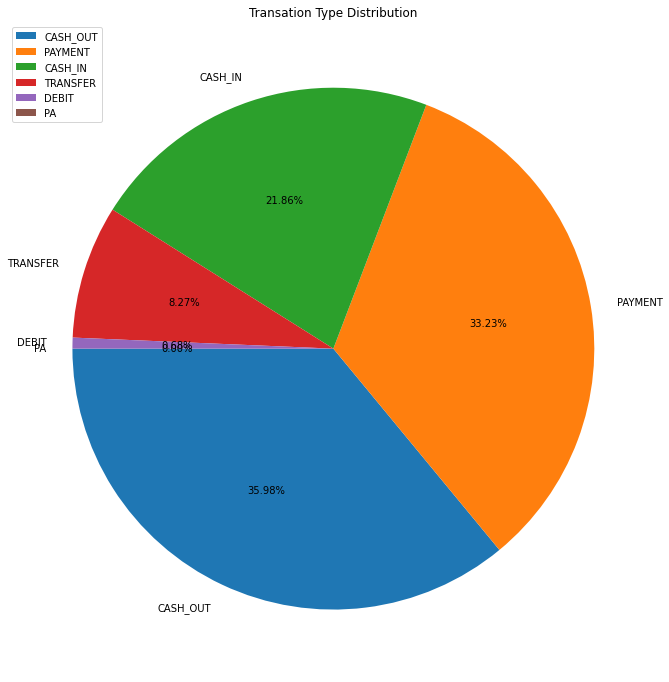

In [61]:
# visualize transaction type distribution
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

labels = transactions
sections = quantity

plt.figure(figsize=(12,12))
plt.pie(sections,labels=labels, startangle=180,autopct="%1.2f%%")
plt.title("Transation Type Distribution",fontsize=12)
plt.legend()
plt.show()

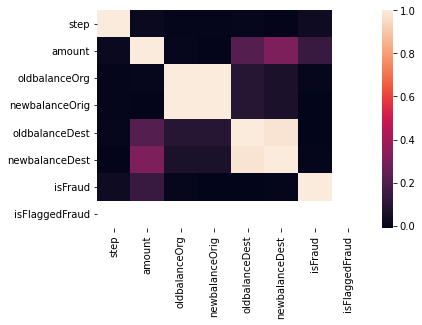

In [29]:
from seaborn import heatmap
heatmap(payments.corr())

In [30]:
# show Correlation
correlation = payments.corr()
print(correlation['isFraud'].sort_values(ascending = False))

isFraud           1.000000
amount            0.140167
step              0.025922
oldbalanceOrg     0.004741
newbalanceDest   -0.000142
oldbalanceDest   -0.008021
newbalanceOrig   -0.010205
isFlaggedFraud         NaN
Name: isFraud, dtype: float64


In [31]:
payments['isFraud'] = payments['isFraud'].map({0:'No Fraud',
                                              1:'Fraud'})
print(payments['isFraud'])

0          No Fraud
1          No Fraud
2             Fraud
3             Fraud
4          No Fraud
             ...   
1186317    No Fraud
1186318    No Fraud
1186319    No Fraud
1186320    No Fraud
1186321         NaN
Name: isFraud, Length: 1186322, dtype: object


In [32]:
# Transform the categorical features into numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
payments['type'] = labelencoder.fit_transform(payments['type'])
print(payments['type'])

0          3
1          3
2          4
3          1
4          3
          ..
1186317    3
1186318    3
1186319    3
1186320    1
1186321    1
Name: type, Length: 1186322, dtype: int64


In [36]:
# Build the Fraud Detection model with Decision Trees 
from sklearn.model_selection import train_test_split
x = np.array(payments[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(payments[["isFraud"]])

In [42]:
# Prediction Test
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[5, 1000, 2000, 0.0]])
print(Model.predict(features))

['Fraud']
